In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, f1_score, mean_squared_error

In [3]:
submit = pd.read_csv('sampleSubmission.csv')

In [7]:
test = pd.read_csv('test.csv')

In [8]:
train = pd.read_csv('train.csv')

In [9]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [12]:
train.

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

# preprocessing

## no NaNs

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


# outliers

In [270]:
train['windspeed'].describe()

count    10886.000000
mean        12.799395
std          8.164537
min          0.000000
25%          7.001500
50%         12.998000
75%         16.997900
max         56.996900
Name: windspeed, dtype: float64

In [300]:
rmv=np.where(abs(train['count']-train['count'].mean()) >= 2*train['count'].std())[0]

In [301]:
filtered_train = train.drop(index=rmv)

In [303]:
filtered_train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


(array([3151., 1458., 1334., 1187.,  925.,  728.,  553.,  397.,  333.,
         231.]),
 array([  1. ,  56.2, 111.4, 166.6, 221.8, 277. , 332.2, 387.4, 442.6,
        497.8, 553. ]),
 <BarContainer object of 10 artists>)

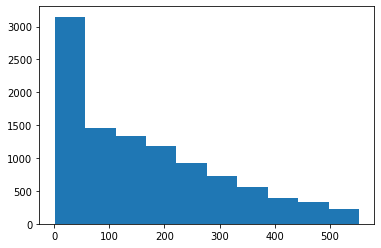

In [308]:
plt.hist(filtered_train['count'])

In [292]:
from scipy.stats import skew, kurtosis

In [304]:
kurtosis(filtered_train['count'], bias=True)

-0.3166692581211641

In [305]:
kurtosis(filtered_train['count'], bias=False)

-0.31624015920548265

In [306]:
skew(filtered_train['count'], bias=True)

0.7808087519210283

In [307]:
skew(filtered_train['count'], bias=False)

0.7809225162385441

In [86]:
train['count'].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

In [201]:
corr = train.corr()
corr['count'].sort_values(ascending=False)

count         1.000000
registered    0.970948
casual        0.690414
temp          0.394454
atemp         0.389784
season        0.163439
windspeed     0.101369
workingday    0.011594
holiday      -0.005393
weather      -0.128655
humidity     -0.317371
Name: count, dtype: float64

In [202]:
corr['temp'].sort_values(ascending=False)

temp          1.000000
atemp         0.984948
casual        0.467097
count         0.394454
registered    0.318571
season        0.258689
workingday    0.029966
holiday       0.000295
windspeed    -0.017852
weather      -0.055035
humidity     -0.064949
Name: temp, dtype: float64

In [206]:
corr

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


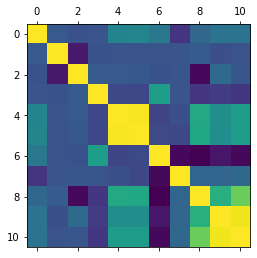

In [205]:
plt.matshow(corr)

## drop atemp bc very high correlation with 

In [221]:
train['count'].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

In [223]:
abs(train['count'][0] - train['count'].mean()) <= 3*train['count'].std()

True

In [227]:
train[abs(train['count'] - train['count'].mean()) >= 3*train['count'].std()]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
6658,2012-03-14 17:00:00,1,0,1,1,28.70,31.820,28,6.0032,140,642,782
6659,2012-03-14 18:00:00,1,0,1,1,28.70,31.820,32,0.0000,102,647,749
6683,2012-03-15 18:00:00,1,0,1,1,27.06,31.060,44,19.0012,98,648,746
6779,2012-03-19 18:00:00,1,0,1,1,26.24,31.060,57,16.9979,120,681,801
6849,2012-04-03 17:00:00,2,0,1,1,25.42,30.305,17,12.9980,123,634,757
...,...,...,...,...,...,...,...,...,...,...,...,...
9935,2012-10-18 08:00:00,4,0,1,1,18.86,22.725,82,16.9979,31,803,834
9944,2012-10-18 17:00:00,4,0,1,2,23.78,27.275,64,22.0028,102,788,890
9945,2012-10-18 18:00:00,4,0,1,2,22.96,26.515,64,22.0028,68,720,788
10519,2012-12-04 17:00:00,4,0,1,1,21.32,25.000,59,15.0013,43,700,743


# datatime preprocessing

In [207]:
X = train.drop(columns=['casual', 'registered', 'count', 'atemp'])
y = train['count']

In [208]:
X

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed
0,2011-01-01 00:00:00,1,0,0,1,9.84,81,0.0000
1,2011-01-01 01:00:00,1,0,0,1,9.02,80,0.0000
2,2011-01-01 02:00:00,1,0,0,1,9.02,80,0.0000
3,2011-01-01 03:00:00,1,0,0,1,9.84,75,0.0000
4,2011-01-01 04:00:00,1,0,0,1,9.84,75,0.0000
...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,50,26.0027
10882,2012-12-19 20:00:00,4,0,1,1,14.76,57,15.0013
10883,2012-12-19 21:00:00,4,0,1,1,13.94,61,15.0013
10884,2012-12-19 22:00:00,4,0,1,1,13.94,61,6.0032


In [209]:
X['year'] = X['datetime'].apply(lambda x : int(x.split('-')[0]))
X['month'] = X['datetime'].apply(lambda x : int(x.split('-')[1]))
X['date'] = X['datetime'].apply(lambda x : int(x.split('-')[2].split(' ')[0]))
X['hour'] = X['datetime'].apply(lambda x : int(x.split('-')[2].split(' ')[1][:2]))


In [210]:
X.drop(columns=['datetime'], inplace=True)

In [211]:
X

,season,holiday,workingday,weather,temp,humidity,windspeed,year,month,date,hour
0,1,0,0,1,9.84,81,0.0000,2011,1,1,0
1,1,0,0,1,9.02,80,0.0000,2011,1,1,1
2,1,0,0,1,9.02,80,0.0000,2011,1,1,2
3,1,0,0,1,9.84,75,0.0000,2011,1,1,3
4,1,0,0,1,9.84,75,0.0000,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,50,26.0027,2012,12,19,19
10882,4,0,1,1,14.76,57,15.0013,2012,12,19,20
10883,4,0,1,1,13.94,61,15.0013,2012,12,19,21
10884,4,0,1,1,13.94,61,6.0032,2012,12,19,22


In [212]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   humidity    10886 non-null  int64  
 6   windspeed   10886 non-null  float64
 7   year        10886 non-null  int64  
 8   month       10886 non-null  int64  
 9   date        10886 non-null  int64  
 10  hour        10886 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 935.6 KB


# convert dtype

In [213]:
cate = ['season', 'holiday', 'workingday', 'weather', 'year', 'month', 'date', 'hour']
for i in cate:
    X[i]=X[i].astype('category')

# outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc32eabd910>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc32eac71d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc32eabd550>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc32eac7a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc32eac7ed0>],
 'means': []}

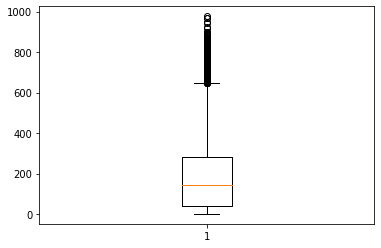

In [220]:
plt.boxplot(y)

In [216]:
outliers = ['temp', 'humidity', 'windspeed']



20.230859819952173

# Standardize

In [111]:
# scale = StandardScaler()

# scale.fit_transform(X)

######## skip for now ############

# modeling

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [150]:
from sklearn.linear_model import LinearRegression, LogisticRegression

In [156]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [157]:
y_pred = lr.predict(X_test)

In [158]:
mean_squared_error(y_test, y_pred)

20172.94694266077

In [195]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [171]:
## corelation 있는 atemp 뺌
newX_train = X_train.drop(columns=['atemp'])
newX_test = X_test.drop(columns=['atemp'])

In [181]:
newX_train

,season,holiday,workingday,weather,temp,humidity,windspeed,year,month,date,hour
6265,1,0,1,2,-1.123356,1.616681,-0.699852,2012,2,17,7
3286,3,0,0,3,1.185867,0.889609,0.763722,2011,8,6,20
7209,2,0,1,2,-0.388603,0.785742,-1.553808,2012,4,18,18
1941,2,0,0,1,0.346149,-0.980003,0.031527,2011,5,7,19
6971,2,0,0,1,0.556079,-2.018677,1.617679,2012,4,8,19
...,...,...,...,...,...,...,...,...,...,...,...
3461,3,0,0,2,0.766008,1.668614,0.519385,2011,8,14,3
1192,1,0,1,1,-0.808462,-1.031937,0.519385,2011,3,14,10
665,1,0,1,1,-1.963074,-1.031937,-0.699852,2011,2,10,23
8014,2,0,1,1,0.556079,-0.097131,0.763722,2012,6,14,7


In [182]:
newX_train['season'].astype('category')

6265    1
3286    3
7209    2
1941    2
6971    2
       ..
3461    3
1192    1
665     1
8014    2
4925    4
Name: season, Length: 8164, dtype: category
Categories (4, int64): [1, 2, 3, 4]

In [194]:
gbr = GradientBoostingRegressor(random_state=0)

gbr.fit(newX_train, y_train)

gbr_pred = gbr.predict(newX_test)

mean_squared_error(y_test, gbr_pred)

4428.997510978655

In [196]:
rfr = RandomForestRegressor(random_state=0)

rfr.fit(newX_train, y_train)

rfr_pred = rfr.predict(newX_test)

mean_squared_error(y_test, rfr_pred)

1801.054177773696

# remove outliers

In [197]:
newX_train

,season,holiday,workingday,weather,temp,humidity,windspeed,year,month,date,hour
6265,1,0,1,2,-1.123356,1.616681,-0.699852,2012,2,17,7
3286,3,0,0,3,1.185867,0.889609,0.763722,2011,8,6,20
7209,2,0,1,2,-0.388603,0.785742,-1.553808,2012,4,18,18
1941,2,0,0,1,0.346149,-0.980003,0.031527,2011,5,7,19
6971,2,0,0,1,0.556079,-2.018677,1.617679,2012,4,8,19
...,...,...,...,...,...,...,...,...,...,...,...
3461,3,0,0,2,0.766008,1.668614,0.519385,2011,8,14,3
1192,1,0,1,1,-0.808462,-1.031937,0.519385,2011,3,14,10
665,1,0,1,1,-1.963074,-1.031937,-0.699852,2011,2,10,23
8014,2,0,1,1,0.556079,-0.097131,0.763722,2012,6,14,7


In [309]:
X

,season,holiday,workingday,weather,temp,humidity,windspeed,year,month,date,hour
0,1,0,0,1,9.84,81,0.0000,2011,1,1,0
1,1,0,0,1,9.02,80,0.0000,2011,1,1,1
2,1,0,0,1,9.02,80,0.0000,2011,1,1,2
3,1,0,0,1,9.84,75,0.0000,2011,1,1,3
4,1,0,0,1,9.84,75,0.0000,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,50,26.0027,2012,12,19,19
10882,4,0,1,1,14.76,57,15.0013,2012,12,19,20
10883,4,0,1,1,13.94,61,15.0013,2012,12,19,21
10884,4,0,1,1,13.94,61,6.0032,2012,12,19,22


In [313]:
from sklearn.feature_selection import GenericUnivariateSelect, chi2

transformer = GenericUnivariateSelect(chi2, mode='k_best', param=7)

X_new = transformer.fit(X, y)

In [319]:
X_new

GenericUnivariateSelect(mode='k_best', param=7,
                        score_func=<function chi2 at 0x7fc2f5bd7f80>)